In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Plotting and Visualizing data
import seaborn as sns ## for visualizing data

##Reading data

In [25]:
avg_monthly_rent = pd.read_csv("https://raw.githubusercontent.com/Pravallika-Myneni/Simple-linear-regression/main/average_monthly_rents.csv?token=ALNM5V6FCXVFKRU27CYUXEDAXELCA", encoding ="latin-1")

population_density = pd.read_csv("https://raw.githubusercontent.com/Pravallika-Myneni/Simple-linear-regression/main/population_density.csv?token=ALNM5V7SGY5CMYSXJVHSJ2LAXELEU", encoding ="latin-1")

In [26]:
avg_monthly_rent.sample

,name,id,average_monthly_rent
278,Borda do Campo,60517,146.25
236,Santa Clara,60316,261.23
250,Trouxemil,60330,199.23


In [27]:
population_density.sample(3)

,name,id,population_density
63,Vila Real,1714,136.9
105,Borralha,10120,256.2
256,Furadouro,60407,14.3


##Checking for the id's the two datasets have in common 

In [28]:
a_set_id = set(avg_monthly_rent['id'])
b_set_id = set(population_density['id'])
len(b_set_id.intersection(a_set_id))

498

Our potential dataset can have 498 rows

## Merging the two Datasets

In [29]:
dataset = pd.merge(population_density, avg_monthly_rent, how="inner", on ="id")
dataset.head(4)

,name_x,id,population_density,name_y,average_monthly_rent
0,Arcos de Valdevez,1601,51.0,Arcos de Valdevez,202.16
1,Caminha,1602,122.2,Caminha,232.24
2,Melgaço,1603,38.7,Melgaço,215.67
3,Monção,1604,91.0,Monção,208.22


We can drop the names (name_x and name_y) and id as our main concentration is on ***Population Density*** and ***Average_monthly Rent***

In [30]:
dataset = dataset.drop(columns=['name_x','name_y','id'])
dataset.head(3)

,population_density,average_monthly_rent
0,51.0,202.16
1,122.2,232.24
2,38.7,215.67


##EDA

In [40]:
correlation = dataset.corr()
correlation

,population_density,average_monthly_rent
population_density,1.000000,0.148989
average_monthly_rent,0.148989,1.000000


##Implementing Simple Linear regression

###Splitting the data into train and test

In [44]:
X = dataset[['population_density']]
y = dataset['average_monthly_rent']

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state = 1703)
print("Training size: ", (X_train.shape[0], y_train.shape[0]))
print("Testing size: ", (X_test.shape[0], y_test.shape[0]))

Training size:  (373, 373)
Testing size:  (125, 125)


### Developing a regression model and fitting the train_data

In [49]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression = linear_regression.fit(X_train, y_train)

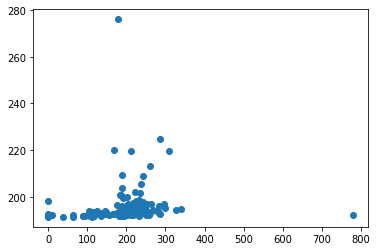

In [52]:
predictions = linear_regression.predict(X_test)
plt.scatter(y_test, predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


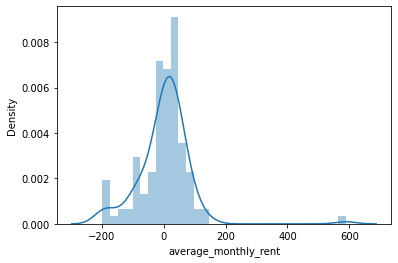

In [53]:
sns.distplot((y_test-predictions))